In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import sys
sys.path.append("..")
from dtw import *

## Basic Example

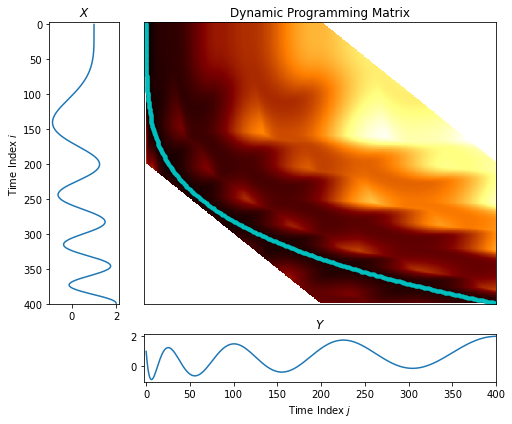

In [2]:
def drawLineColored(idx, x, C):
    for i in range(len(x)-1):
        plt.plot(idx[i:i+2], x[i:i+2], c=C[i, :])


#Make dynamic time warping example
np.random.seed(100)
t1 = np.linspace(0, 1, 400)
t1 = t1
t2 = np.sqrt(t1)
t1 = t1**2
N = len(t1)

X = np.cos(8*np.pi*t1) + t1
Y = np.cos(8*np.pi*t2) + t2

cost, D, path = cdtw(X, Y, 200)
path = np.array(path, dtype=int)

fac = 0.6
left_lim = -3
plt.figure(figsize=(fac*14, fac*10))

plt.subplot2grid((5, 6), (0, 0), rowspan=4)
plt.plot(X, np.arange(X.size))
plt.ylim([D.shape[1], left_lim])
plt.title("$X$")
plt.ylabel("Time Index $i$")

plt.subplot2grid((5, 6), (0, 1), rowspan=4, colspan=4)
plt.imshow(D[1::, 1::], interpolation = 'nearest', cmap=plt.get_cmap('afmhot'), aspect = 'auto')
plt.plot(path[:, 1], path[:, 0], 'c.')
plt.xlim([left_lim, D.shape[1]])
plt.ylim([D.shape[0], -1])
plt.xticks([])
plt.yticks([])
plt.title("Dynamic Programming Matrix")

plt.subplot2grid((5, 6), (4, 1), colspan=4)
plt.plot(Y)
plt.xlim([left_lim, D.shape[1]])
plt.title("$Y$")
plt.xlabel("Time Index $j$")
plt.tight_layout()

plt.savefig("DTWExample.svg", bbox_inches='tight')

## Triangle Inequality

In [3]:
m = 10
n = 20
a = np.array([-1, -1.001]*m + [0])
b = np.array([-1, 0, 1])
c = np.array([0] + [1, 1.001]*n)
ab, _, _ = cdtw(a, b)
bc, _, _ = cdtw(b, c)
ac, _, _ = cdtw(a, c)
print("ab = ", ab, ", bc = ", bc, ", ac = ", ac)

ab =  1.0099999904632568 , bc =  1.02000093460083 , ac =  60.029991149902344


## Stability

In [4]:
n = 1000
x = np.array([0, 1])
y = np.linspace(0, 1, n+1)
dist, _, _ = cdtw(x, y)
print("dist = ", dist, "n/4 + 1 = ", n/4+1)

dist =  250.00001525878906 n/4 + 1 =  251.0
